[Reference](https://medium.com/mlearning-ai/wordclouds-with-python-c287887acc8b)

In [1]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# essential libraries
import os 
import pandas as pd
import numpy as np

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()

    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)

    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
# get URL
ds = requests.get("https://en.wikipedia.org/wiki/Data_science")
 
# display status code
print(ds.status_code)
 
# display scrapped data
print(ds.content)

# store content into variable
ds_text = BeautifulSoup(ds.content, 'html.parser').text

200
b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Data science - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b236d23c-d68d-431b-b0ed-64a93dbc02f0","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1127202061,"wgRevisionId":1127202061,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupatio

In [5]:
# get URL
meta = requests.get("https://en.wikipedia.org/wiki/Meta")

# store content into variable
meta_text = BeautifulSoup(meta.content, 'html.parser').text

# use function to clean text
meta_text = clean(meta.text)

In [6]:
len(meta_text)

66633

In [7]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

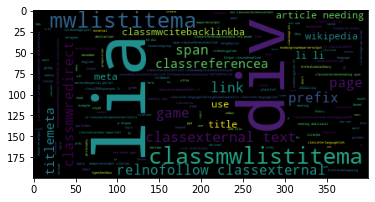

In [8]:
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

(0.0, 1.0, 0.0, 1.0)

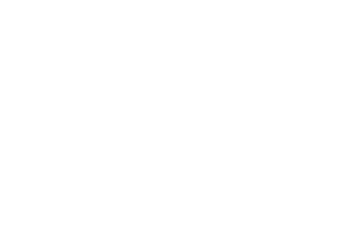

In [9]:
plt.axis("off")

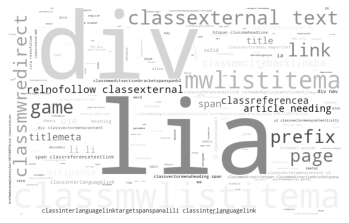

In [10]:
wc = WordCloud(background_color='white', colormap = 'binary',
     stopwords = ['meta'], width = 800, height = 500).generate(meta_text)
plt.axis("off")
plt.imshow(wc)

In [11]:
# meta_mask = np.array(Image.open('./meta_logo.png'))
# meta_mask

In [12]:
# wc = WordCloud(background_color = 'black', mask = maskable_image, contour_width = 2,
#      contour_color = 'black', colormap = 'BuPu_r', width = 800, height = 500).generate(meta_text)
# plt.axis("off")
# plt.imshow(wc)

In [13]:
# wc = WordCloud(background_color = '#FFFFFF', mask = apple_mask, contour_width = 2,
#      contour_color = '#FFFFFF', colormap = 'bone', stopwords = ['apple']).generate(apple_text)
# plt.axis('off')
# plt.imshow(wc)

# wc = WordCloud(background_color = 'white', mask = amazon_mask, contour_width = 2,
#      contour_color = 'white', colormap = 'copper', stopwords = ['Amazon']).generate(amazon_text)
# plt.axis('off')
# plt.imshow(wc)

# wc = WordCloud(background_color = 'black', mask = netflix_mask, contour_width = 2,
#      contour_color = 'black', colormap = 'YlOrRd', stopwords = ['Netflix']).generate(netflix_text)
# plt.axis("off")
# plt.imshow(wc)

# wc = WordCloud(background_color = 'white', mask = google_mask, contour_width = 2,
#      contour_color = 'white', colormap = 'Paired', stopwords = ['google']).generate(google_text)
# plt.axis("off")
# plt.imshow(wc)